# Scraping hemköp

In [1]:
from selenium import webdriver
from selenium.webdriver import Firefox
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import requests
import pandas as pd
import os
import numpy as np
import time

In [47]:
# Creating a web driver
driver = webdriver.Firefox()
driver.maximize_window()
driver.get('https://www.hemkop.se/veckans-erbjudanden')

time.sleep(1)

element = driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]')
element.click()

last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    #Scroll down to the bottom of the page
    element = driver.find_element(By.XPATH, "/html/body/div[4]/div[7]/footer/div[5]/div[2]/div/a[1]/div")
    element.location_once_scrolled_into_view
    
    #Wait for new content to load
    time.sleep(3)
    
    #Check if new content has been loaded
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    else:
        last_height = new_height

# Getting all the items and prices
elements = driver.find_elements(By.CSS_SELECTOR, "div.ax-product-grid-tile > ax-product-puff > div")
orig_price = []
sales_price = []
names = []
price = []
for container in elements:
    
    orig_price.append(item_extract(container, "div > div > ax-product-pricelabel > div > div > div > span.product-compare-price"))
    sales_price.append(item_extract(container, "div > div > ax-product-pricelabel > div > div > div > span.product-price-label-promotion-info"))
    names.append(item_extract(container, "div > div > div:nth-child(2) > a:nth-child(1)"))
    price.append(item_extract(container, 'ax-product-pricelabel:nth-child(4) > div:nth-child(1) > div:nth-child(2) > div:nth-child(1) > span:nth-child(2)'))
    #product_prices = driver.find_elements(By.CSS_SELECTOR, "ax-product-pricelabel:nth-child(4) > div:nth-child(1) > div:nth-child(2) > div:nth-child(1) > span:nth-child(2)")
    #product_names = driver.find_elements(By.CSS_SELECTOR, "div > div > div:nth-child(2) > a:nth-child(1)")
    #product_sales_prices = driver.find_elements(By.CSS_SELECTOR, "div > div > ax-product-pricelabel > div > div > div:nth-child(2) > span:nth-child(1)")
    #product_orig_prices = driver.find_elements(By.CSS_SELECTOR, "div > div > ax-product-pricelabel > div > div > div:nth-child(1) > span:nth-child(1)")

In [25]:
def item_extract(item_cont, key):
    """Item_cont is the i when looping through a
    container and key is the css selector tag for 
    a specific element"""
    #parse = item_cont.select(key)
    parse = item_cont.find_elements(By.CSS_SELECTOR, key)
    if parse == []:
        return np.nan
    else:
        return parse[0].text

In [48]:
print(len(orig_price))
print(len(sales_price))
print(len(names))
print(len(price))

297
297
297
297


In [19]:
prices = [i.text for i in product_prices]
names = [i.text for i in product_names]
sales_prices = [i.text for i in product_sales_prices]
product_orig_prices = [i.text for i in product_orig_prices]

229

In [50]:
df = {
    'product_price': price,
    'product_name': names,
    'sales_price': sales_price,
    'original_price': orig_price   
}

In [74]:
df = pd.DataFrame(df)
df

,product_price,product_name,sales_price,original_price
0,"10,00",Bacon Rökt&skivat,"Jmf pris 71,43 kr/kg","Jmf pris 106,79 kr/kg"
1,"59,00",Kyckling Filé Fryst,"Jmf pris 65,55 kr/kg","Jmf pris 77,72 kr/kg"
2,"25,00",Levain Vete,"Jmf pris 33,33 kr/kg","Jmf pris 53,27 kr/kg"
3,"49,00",Normalsaltat Smör & Rapsolja 75%,"Jmf pris 81,67 kr/kg","Jmf pris 99,92 kr/kg"
4,"20,00",Druvor Gröna Klass 1,"Jmf pris 40,00 kr/kg","Jmf pris 79,90 kr/kg"
...,...,...,...,...
255,"19,95",Våtservetter Baby,"Jmf pris 0,24 kr/st","Jmf pris 0,32 kr/st"
256,"14,95",Våtservetter,"Jmf pris 0,15 kr/st","Jmf pris 0,21 kr/st"
257,"10,95",Majssnacks Banan Mango Från 10 Månader,"Jmf pris 500,00 kr/kg","Jmf pris 547,50 kr/kg"
258,"10,95",Äppelmunk,"Jmf pris 153,44 kr/kg","Jmf pris 173,81 kr/kg"


In [68]:
df.dropna(inplace = True)
df

,product_price,product_name,sales_price,original_price
0,"10,00",Bacon Rökt&skivat,"Jmf pris 71,43 kr/kg","Jmf pris 106,79 kr/kg"
1,"59,00",Kyckling Filé Fryst,"Jmf pris 65,55 kr/kg","Jmf pris 77,72 kr/kg"
2,"25,00",Levain Vete,"Jmf pris 33,33 kr/kg","Jmf pris 53,27 kr/kg"
3,"49,00",Normalsaltat Smör & Rapsolja 75%,"Jmf pris 81,67 kr/kg","Jmf pris 99,92 kr/kg"
4,"20,00",Druvor Gröna Klass 1,"Jmf pris 40,00 kr/kg","Jmf pris 79,90 kr/kg"
...,...,...,...,...
255,"19,95",Våtservetter Baby,"Jmf pris 0,24 kr/st","Jmf pris 0,32 kr/st"
256,"14,95",Våtservetter,"Jmf pris 0,15 kr/st","Jmf pris 0,21 kr/st"
257,"10,95",Majssnacks Banan Mango Från 10 Månader,"Jmf pris 500,00 kr/kg","Jmf pris 547,50 kr/kg"
258,"10,95",Äppelmunk,"Jmf pris 153,44 kr/kg","Jmf pris 173,81 kr/kg"


### Creating percentage_saved, original_price_cleaned and sales_price_cleaned

In [87]:
import re
pattern = r"\d+,\d+"

ord_price_clean = [re.search(pattern, price).group(0) for price in df.original_price]
sales_price_clean = [re.search(pattern, price).group(0) for price in df.sales_price]

ord_price_clean = [i.replace(",", ".") for i in ord_price_clean]
sales_price_clean = [i.replace(",", ".") for i in sales_price_clean]

df["percentage_saved"] = [100 * ((float(ord_price_clean[i]) - float(sales_price_clean[i]))/float(ord_price_clean[i])) for i in range(len(sales_price_clean))]

In [97]:
df['original_price_cleaned'] = ord_price_clean
df['sales_price_cleaned'] = sales_price_clean

In [98]:
df_sorted = df.sort_values(by = 'percentage_saved', ascending = False)

In [102]:
df_sorted.drop(266, inplace = True) #dropping an outlier value that didnt make sense

In [120]:
df_sorted

,product_price,product_name,sales_price,original_price,percentage_saved,original_price_cleaned,sales_price_cleaned
4,20.00,Druvor Gröna Klass 1,"Jmf pris 40,00 kr/kg","Jmf pris 79,90 kr/kg",49.937422,79.90,40.00
8,15.00,Jordgubb Cola Sockerfri Vegan,"Jmf pris 214,29 kr/kg","Jmf pris 370,71 kr/kg",42.194707,370.71,214.29
52,28.95,White System Medium Tandborste,"Jmf pris 17,50 kr/st","Jmf pris 28,95 kr/st",39.550950,28.95,17.50
2,25.00,Levain Vete,"Jmf pris 33,33 kr/kg","Jmf pris 53,27 kr/kg",37.431950,53.27,33.33
5,25.00,Tomat Babyplommon Hink Klass 1,"Jmf pris 50,00 kr/kg","Jmf pris 77,90 kr/kg",35.815148,77.90,50.00
...,...,...,...,...,...,...,...
172,19.95,Tomatpuré Ekologisk,"Jmf pris 95,00 kr/kg","Jmf pris 99,75 kr/kg",4.761905,99.75,95.00
203,20.95,Cacao Mörk Choklad 70% Kakao,"Jmf pris 200,00 kr/kg","Jmf pris 209,50 kr/kg",4.534606,209.50,200.00
118,33.95,Tomatsoppa,"Jmf pris 72,22 kr/kg","Jmf pris 75,44 kr/kg",4.268293,75.44,72.22
241,26.95,Lasagne Bolognese Italiensk Fryst,"Jmf pris 65,00 kr/kg","Jmf pris 67,38 kr/kg",3.532205,67.38,65.00


In [114]:
df_sorted["product_price"].max()

189.0

In [111]:
df_sorted.product_price = df_sorted.product_price.str.replace(",", ".")
df_sorted.product_price = df_sorted.product_price.astype(float)

### Description of data set

In [117]:
df_sorted.describe()

,product_price,percentage_saved
count,228.000000,228.000000
mean,24.914035,15.759815
std,19.686423,6.909047
min,4.950000,3.400236
25%,13.950000,11.407612
50%,19.975000,15.059539
75%,28.950000,18.535049
max,189.000000,49.937422


### Mean savings for bins

In [125]:
bins = [0,10,20,50,100,200]

groups = pd.cut(df_sorted['product_price'], bins)

mean_savings = df_sorted.groupby(groups)["percentage_saved"].mean()
savings_per_group = pd.DataFrame(mean_savings)
savings_per_group

,percentage_saved
product_price,
"(0, 10]",19.365449
"(10, 20]",15.913549
"(20, 50]",14.637123
"(50, 100]",18.149678
"(100, 200]",10.723854


In [145]:
savings_per_group.reset_index(inplace = True)

In [146]:
savings_per_group

,product_price,percentage_saved
0,"(0, 10]",19.365449
1,"(10, 20]",15.913549
2,"(20, 50]",14.637123
3,"(50, 100]",18.149678
4,"(100, 200]",10.723854


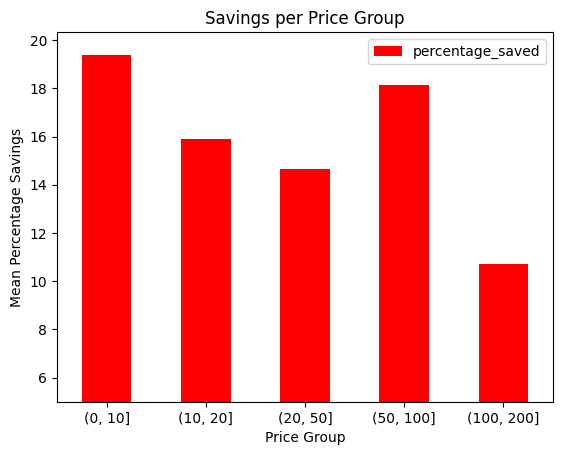

In [133]:
import matplotlib.pyplot as plt

# Assuming the DataFrame is stored in a variable called "df"
ax = savings_per_group.plot.bar(rot=0, color = "red")
ax.set_ylim(bottom = 5)
ax.set_xlabel("Price Group")
ax.set_ylabel("Mean Percentage Savings")
ax.set_title("Savings per Price Group")

plt.show()

### Number of products per bin

In [182]:
df_sorted.head(5)

,product_price,product_name,sales_price,original_price,percentage_saved,original_price_cleaned,sales_price_cleaned,bins
4,20.00,Druvor Gröna Klass 1,"Jmf pris 40,00 kr/kg","Jmf pris 79,90 kr/kg",49.937422,79.90,40.00,"(40, 50]"
8,15.00,Jordgubb Cola Sockerfri Vegan,"Jmf pris 214,29 kr/kg","Jmf pris 370,71 kr/kg",42.194707,370.71,214.29,"(40, 50]"
52,28.95,White System Medium Tandborste,"Jmf pris 17,50 kr/st","Jmf pris 28,95 kr/st",39.550950,28.95,17.50,"(30, 40]"
2,25.00,Levain Vete,"Jmf pris 33,33 kr/kg","Jmf pris 53,27 kr/kg",37.431950,53.27,33.33,"(30, 40]"
5,25.00,Tomat Babyplommon Hink Klass 1,"Jmf pris 50,00 kr/kg","Jmf pris 77,90 kr/kg",35.815148,77.90,50.00,"(30, 40]"


In [183]:
df_sorted.describe()

,product_price,percentage_saved
count,228.000000,228.000000
mean,24.914035,15.759815
std,19.686423,6.909047
min,4.950000,3.400236
25%,13.950000,11.407612
50%,19.975000,15.059539
75%,28.950000,18.535049
max,189.000000,49.937422


In [179]:
bins = pd.cut(df_sorted['percentage_saved'], bins= [0, 10, 20, 30, 40, 50])
grouped = df.groupby(bins)
counts = grouped.size()
saving_groups = pd.DataFrame(counts, columns=['count'])

saving_groups

,count
percentage_saved,
"(0, 10]",42
"(10, 20]",140
"(20, 30]",39
"(30, 40]",5
"(40, 50]",2


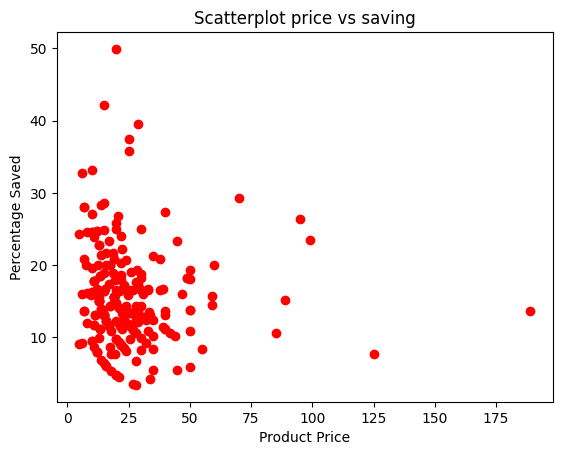

In [187]:
plt.scatter(df_sorted['product_price'], df_sorted['percentage_saved'], color = 'red')
plt.xlabel('Product Price')
plt.ylabel('Percentage Saved')
plt.title('Scatterplot price vs saving')
plt.show()

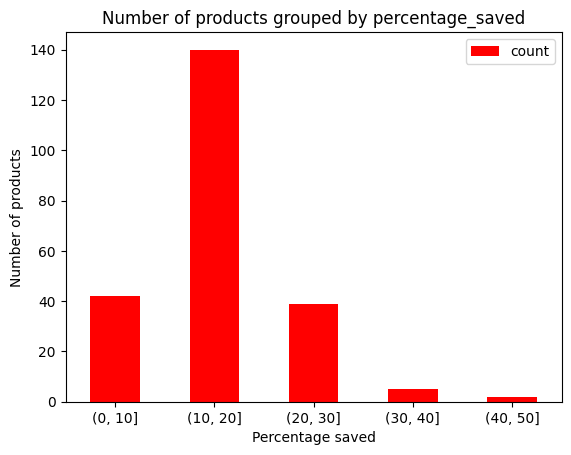

In [189]:
import matplotlib.pyplot as plt


ax = saving_groups.plot.bar(rot = 0, color = "red")
#ax.set_ylim(bottom = 5)
ax.set_xlabel("Percentage saved")
ax.set_ylabel("Number of products")
ax.set_title("Number of products grouped by percentage_saved")

plt.show()

### Mean price for top 15 and bottom 15 percentage_saved

In [141]:
top_mean = df_sorted.head(20)["product_price"].mean()
bottom_mean = df_sorted.tail(20)["product_price"].mean()


28.630000000000003
24.647499999999997


# NLP for categorization

## Step 1: data cleaning

In [8]:
food_df = df.copy()

In [14]:
food_df["product_name"] = food_df["product_name"].replace(["med", "&", "Klass", "1", "%", "av", "Naturell", 
                                                          "Liter", "Refill"],"", regex = True)

In [15]:
food_df['product_name'] = food_df['product_name'].replace('\d+', '', regex=True)

In [16]:
food_df[100:150]

,product_price,product_name
100,"27,95",Gratängost Riven
101,"25,95",Hamburgerost Cheddar
102,"20,95",Färskost Paprika
103,"14,95",Mozzarella
104,"22,50",Mandeldryck Utan Tillsatt Socker
105,"33,50","Hallon Yoghurt Fruktbitar Laktosfri ,"
106,"19,50",Choklad Proteinpudding Laktosfri
107,"29,95",Äpple Fläder Juice Utan Fruktkött
108,"20,95",Franska Örter Lätt Crème Fraiche
109,"18,95",Sojadryck Vegetabilisk


## Step 2: Tokenization

In [117]:
import nltk

In [118]:
nltk.download('punkt')

tokens = [nltk.word_tokenize(i) for i in food_df["product_name"]]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavmalmer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [120]:
tokens[0]

['Bacon', 'Röktskivat']

In [122]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language = 'swedish')

stemmed_tokens = [stemmer.stem(j) for j in i for i in tokens]

In [127]:
stemmed_tokens[5]

'%'

## Step 2: Tokenization new try using spacy

In [128]:
pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 28.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.9/491.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.1/859.1 kB 22.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 35.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [190]:
df_sorted.head()

,product_price,product_name,sales_price,original_price,percentage_saved,original_price_cleaned,sales_price_cleaned,bins
4,20.00,Druvor Gröna Klass 1,"Jmf pris 40,00 kr/kg","Jmf pris 79,90 kr/kg",49.937422,79.90,40.00,"(40, 50]"
8,15.00,Jordgubb Cola Sockerfri Vegan,"Jmf pris 214,29 kr/kg","Jmf pris 370,71 kr/kg",42.194707,370.71,214.29,"(40, 50]"
52,28.95,White System Medium Tandborste,"Jmf pris 17,50 kr/st","Jmf pris 28,95 kr/st",39.550950,28.95,17.50,"(30, 40]"
2,25.00,Levain Vete,"Jmf pris 33,33 kr/kg","Jmf pris 53,27 kr/kg",37.431950,53.27,33.33,"(30, 40]"
5,25.00,Tomat Babyplommon Hink Klass 1,"Jmf pris 50,00 kr/kg","Jmf pris 77,90 kr/kg",35.815148,77.90,50.00,"(30, 40]"
